In [129]:
using SymPy


In [11]:
function productorio(listx,x,j) #Se crea la función productorio que toma como entradas una lista de puntos, la 
    #variable y un elemento j.
    producto = 1
    for m in 1:length(listx) #Se le da un intervalo a m desde 1 hasta el número de puntos de la lista.
        if m != j
            producto = producto*(x - listx[m]) / (listx[j] - listx[m]) #Se realizan las bases polinomiales  
            #de Lagrange
        end
    end
    return producto #Se regresa el valor del producto para el elemento j.
end
      
    

productorio (generic function with 1 method)

In [17]:
function interpolacionlagrange(listx,listy,x)#Se crea una función que toma como entradas dos listas de puntos.
    L = 0
    for j in 1:length(listx) #Se asigna un intervalo a j.
        L += listy[j]*productorio(listx,x,j) #Se realiza la combinación lineal que es la interpolación polinomial
        #en la forma de Lagrange.
    end
    return L #Se regresa el valor de la interpolación.
end

interpolacionlagrange (generic function with 1 method)

In [18]:
function interpolador(x,f,xi,xf,n) #Se crea una función cuyas entradas son una función cualquiera, un intervalo 
    #dado y un número de divisiones del intervalo. 
    listx = linspace(xi,xf,n) #Se define una lista de puntos donde se especifica el intervalo y el número de 
    #divisiones de éste.
    listy = f(listx) #Se crea una función cuya entrada es la lista anterior.
    p = interpolacionlagrange(listx,listy,x) #Se define p como la función que se creó anteriormente.
    return p #Se regresa el valor de p.
end
   

interpolador (generic function with 1 method)

In [19]:
using PyPlot


In [116]:
interpolacion = [] #Se crea un vector.
for x in linspace(0,2pi,50) #Se asigna un intervalo a x y el número de divisiones de éste.
    push!(interpolacion,interpolador(x,cos,0,2*pi,10)) #Se guardan en el vector que creamos los valores de la 
    #función interpolador para una función, un intervalo y un número de divisiones del intervalo dados. 
end

In [29]:
interpolacion #Se presenta el vector interpolación.

50-element Array{Any,1}:
    1.0      
    0.967547 
    0.871414 
    0.718328 
    0.518354 
    0.284516 
    0.0320615
   -0.222509 
   -0.462537 
   -0.672307 
   -0.838094 
   -0.949055 
   -0.99794  
    ⋮        
  -17.3197   
  -25.2163   
  -36.2792   
  -51.5638   
  -72.3929   
 -100.405    
 -137.608    
 -186.44     
 -249.838    
 -331.311    
 -435.022    
 -565.881    

In [117]:
x = linspace(0,2pi,50) #Se define una lista de puntos en el intervalo de 0 a 2pi con 50 divisiones.

linspace(0.0,6.283185307179586,50)

In [118]:
y = cos(linspace(0,2pi,10)) #Se crea una lista de puntos que son la evaluación de la función coseno en los 
#elementos de la lista con intervalo 0 a 2pi cuya división es de 10 puntos.

10-element Array{Float64,1}:
  1.0     
  0.766044
  0.173648
 -0.5     
 -0.939693
 -0.939693
 -0.5     
  0.173648
  0.766044
  1.0     

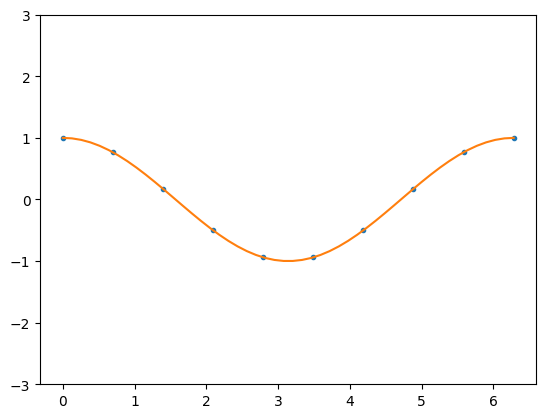

In [119]:
plot(linspace(0,2pi,10),y,".") #Se grafican los 10 puntos en el intervalo 0 a 2pi.
plot(x,interpolacion) #Se grafica a su vez la interpolación que ajusta estos puntos.
ylim(-3,3)
show();

In [41]:
function cosenocuadrado(x) #Se define la función coseno cuadrado.
    x = (cos(x))^2
    return x
end

LoadError: syntax: expected "(" in function definition

In [42]:
y = [] #Se crea un vector 
for x in linspace(0,2pi,10) 
    push!(y,cosenocuadrado(x)) #Se guardan en el vector "y" los valores de la función coseno cuadrado del 
    #intervalo 0 a 2pi con división de 10 puntos.
end


In [44]:
y #Se muestra el vector "y"


10-element Array{Any,1}:
 1.0      
 0.586824 
 0.0301537
 0.25     
 0.883022 
 0.883022 
 0.25     
 0.0301537
 0.586824 
 1.0      

In [120]:
interpolacion = [] #Se crea otro vector que guarde los valores de la función interpolacionlagrange evaluados en 
#el intervalo de 0 a 2pi con 10 divisiones.
for x in linspace(0,2pi,50)
    push!(interpolacion,interpolacionlagrange(linspace(0,2pi,10),y,x))
end

In [51]:
interpolacion #Se muestra el vector.

50-element Array{Any,1}:
    1.0       
    0.896446  
    0.810862  
    0.687183  
    0.521922  
    0.338984  
    0.171715  
    0.0509671 
   -0.00195408
    0.0215323 
    0.117027  
    0.268993  
    0.453944  
    ⋮         
   15.3455    
   27.1097    
   45.8655    
   74.6061    
  117.236     
  178.764     
  265.529     
  385.446     
  548.293     
  766.032     
 1053.17      
 1427.13      

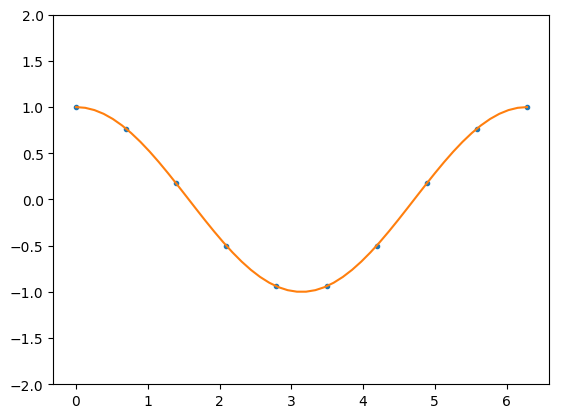

In [122]:
plot(linspace(0,2pi,10),y,".") #Se grafican los 10 puntos del intervalo 0 a 2pi dados para la función coseno 
#cuadrado.
plot(linspace(0,2pi,50),interpolacion) #Se grafica la interpolación de los 10 puntos.
ylim(-2,2)
show();

In [106]:
interpolacion = [] #Se define otro vector que guardará la interpolación de siete puntos dados.
for x in linspace(0,7,100)
    push!(interpolacion,interpolacionlagrange([0,2,3,4,5,6,7],[10,-10,-4,0,5,20,-1],x))
end

In [107]:
x = linspace(0,7,100) #Se crea una lista de puntos que sirven para poder graficar la función interpoladora.

linspace(0.0,7.0,100)

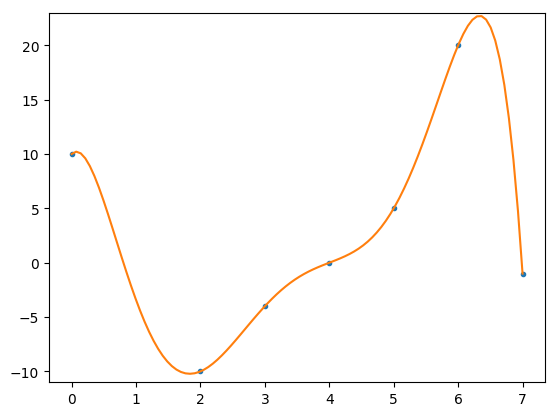

In [112]:
plot([0,2,3,4,5,6,7],[10,-10,-4,0,5,20,-1],".") #Se grafican los siete puntos dados. 
plot(x,interpolacion) #Se grafica la función interpoladora de dichos puntos.
ylim(-11,23)
show();

In [113]:
x = Sym("x") #Se define una variable simbólica.
interpolador(x,cos,0,2*pi,10) #Se evalúa la función interpoladora en la variable simbólica para el caso del coseno. 

0.000482277735278589*x*(x - 6.28318530717959)*(x - 5.58505360638185)*(x - 4.88
692190558412)*(x - 4.18879020478639)*(x - 3.49065850398866)*(x - 2.79252680319
093)*(x - 2.0943951023932)*(x - 1.39626340159546) - 0.000437293948740017*x*(x 
- 6.28318530717959)*(x - 5.58505360638185)*(x - 4.88692190558412)*(x - 4.18879
020478639)*(x - 3.49065850398866)*(x - 2.79252680319093)*(x - 2.0943951023932)
*(x - 0.698131700797732) - 0.00293798806520488*x*(x - 6.28318530717959)*(x - 5
.58505360638185)*(x - 4.88692190558412)*(x - 4.18879020478639)*(x - 3.49065850
398866)*(x - 2.79252680319093)*(x - 1.39626340159546)*(x - 0.698131700797732) 
+ 0.0082824171144903*x*(x - 6.28318530717959)*(x - 5.58505360638185)*(x - 4.88
692190558412)*(x - 4.18879020478639)*(x - 3.49065850398866)*(x - 2.09439510239
32)*(x - 1.39626340159546)*(x - 0.698131700797732) - 0.0082824171144903*x*(x -
 6.28318530717959)*(x - 5.58505360638185)*(x - 4.88692190558412)*(x - 4.188790
20478639)*(x - 2.79252680319093)*(x - 2.094395102393

In [114]:
interpolacionlagrange(linspace(0,2pi,10),y,x)
#Se evalúa la función interpoladora en la variable simbólica para el caso del coseno cuadrado.

0.000369446179150168*x*(x - 6.28318530717959)*(x - 5.58505360638185)*(x - 4.88
692190558412)*(x - 4.18879020478639)*(x - 3.49065850398866)*(x - 2.79252680319
093)*(x - 2.0943951023932)*(x - 1.39626340159546) - 7.593529730348e-5*x*(x - 6
.28318530717959)*(x - 5.58505360638185)*(x - 4.88692190558412)*(x - 4.18879020
478639)*(x - 3.49065850398866)*(x - 2.79252680319093)*(x - 2.0943951023932)*(x
 - 0.698131700797732) + 0.00146899403260244*x*(x - 6.28318530717959)*(x - 5.58
505360638185)*(x - 4.88692190558412)*(x - 4.18879020478639)*(x - 3.49065850398
866)*(x - 2.79252680319093)*(x - 1.39626340159546)*(x - 0.698131700797732) - 0
.00778292624475745*x*(x - 6.28318530717959)*(x - 5.58505360638185)*(x - 4.8869
2190558412)*(x - 4.18879020478639)*(x - 3.49065850398866)*(x - 2.0943951023932
)*(x - 1.39626340159546)*(x - 0.698131700797732) + 0.00778292624475745*x*(x - 
6.28318530717959)*(x - 5.58505360638185)*(x - 4.88692190558412)*(x - 4.1887902
0478639)*(x - 2.79252680319093)*(x - 2.0943951023932

In [115]:
interpolacionlagrange([0,2,3,4,5,6,7],[10,-10,-4,0,5,20,-1],x) 
#Se evalúa la función interpoladora en la variable simbólica para el caso de los siete puntos dados.

                                                                              
                                                                              
x*(x - 7)*(x - 6)*(x - 5)*(x - 4)*(x - 3)   x*(x - 7)*(x - 6)*(x - 5)*(x - 4)*
----------------------------------------- - ----------------------------------
                    24                                          18            

                                                                              
                                                                              
(x - 2)   x*(x - 7)*(x - 6)*(x - 4)*(x - 3)*(x - 2)   5*x*(x - 7)*(x - 5)*(x -
------- + ----------------------------------------- - ------------------------
                              12                                           36 

                                                                  /  x    \   
                                                                  |- - + 1|*(x
 4)*(x - 3)*(x - 2)   x*(x - 6)*(x - 5)*(x - 4)*(x

Método de Simpson

In [130]:
x,y=symbols("x,y")

(x,y)

In [131]:
function F(f,a) #Se define una función que tome como entrada una función f y un valor inicial.
    f(a)
end

F (generic function with 1 method)

In [132]:
function metodo_simpson(F,a,b,n) #Se define una función que calcule la integral de una función dada usando el 
    #método de Simpson que tome como entradas a la función, el intervalo de integración, y el número de 
    #particiones del intervalo.
    x = a
    I = 0
    while x < b
        x = x + ((b-a) / n)
        I += (b - a) * (F(x) + 4 * F(x + (b-a) / 2n) + F(x + (b-a)/n)) / 6n
    end
   return I #Se regresa el valor de la integral.
end

metodo_simpson (generic function with 1 method)

In [136]:
metodo_simpson(x^2,1,5,10000)

41.3529363734760